In [19]:
import pandas as pd
import ast

# Bangalore_Cars

In [65]:
df = pd.read_excel("bangalore_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [67]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [69]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
bangalore_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
bangalore_df['City'] = 'Bangalore'

# Saving the merged DataFrame to a CSV file
bangalore_df.to_csv("bangalore_df_updated.csv", index=False)

# Merged DataFrame
print(bangalore_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

# Chennai_Cars

In [75]:
df = pd.read_excel("chennai_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [77]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [79]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
chennai_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
chennai_df['City'] = 'Chennai'

# Saving the merged DataFrame to a CSV file
chennai_df.to_csv("chennai_df_updated.csv", index=False)

# Merged DataFrame
print(chennai_df)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

# Delhi_Cars

In [81]:
df = pd.read_excel("delhi_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [83]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [85]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
delhi_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
delhi_df['City'] = 'Delhi'

# Saving the merged DataFrame to a CSV file
delhi_df.to_csv("delhi_df_updated.csv", index=False)

# Merged DataFrame
print(delhi_df)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

# Hyderabad_Cars

In [87]:
df = pd.read_excel("hyderabad_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [89]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [91]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
hyderabad_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
hyderabad_df['City'] = 'Hyderabad'

# Saving the merged DataFrame to a CSV file
hyderabad_df.to_csv("hyderabad_df_updated.csv", index=False)

# Merged DataFrame
print(hyderabad_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

# Jaipur_Cars

In [93]:
df = pd.read_excel("jaipur_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [95]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [97]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
jaipur_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
jaipur_df['City'] = 'Jaipur'

# Saving the merged DataFrame to a CSV file
jaipur_df.to_csv("jaipur_df_updated.csv", index=False)

# Merged DataFrame
print(jaipur_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

# Kolkata_Cars

In [99]:
df = pd.read_excel("kolkata_cars.xlsx")
df.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [101]:
# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

In [103]:
# Initialize empty DataFrames for each column
details_df = pd.DataFrame()
overview_df = pd.DataFrame()
features_df = pd.DataFrame()
specs_df = pd.DataFrame()
links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
kolkata_df = pd.concat([details_df, overview_df, features_df, specs_df, links_df], axis=1)

# Adding the 'City' column
kolkata_df['City'] = 'Kolkata'

# Saving the merged DataFrame to a CSV file
kolkata_df.to_csv("kolkata_df_updated.csv", index=False)

# Merged DataFrame
print(kolkata_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

# Concate all 6 Dataset to a New dataset

In [105]:
import pandas as pd

In [107]:
# List of files for each city's dataset
csv_files = [
    'bangalore_df_updated.csv',
    'chennai_df_updated.csv',
    'delhi_df_updated.csv',
    'hyderabad_df_updated.csv',
    'jaipur_df_updated.csv',
    'kolkata_df_updated.csv'
]

# Empty List to store the individual DataFrames
dataframes = []

# Loop through each file path and read the CSV file into a DataFrame
for i in csv_files:
    df = pd.read_csv(i)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to the specified path
combined_df.to_csv('car_dekho_Structured.csv', index=False)

print(f"All datasets concatenated and saved as car_dekho_Structured")

All datasets concatenated and saved as car_dekho_Structured


# Data cleaning and Pre Processing 

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load the dataset
df = pd.read_csv('car_dekho_Structured.csv', low_memory=False)
df.isnull().sum()

it                           0
ft                           0
bt                           4
km                           0
transmission                 0
                          ... 
data_1_list_9_value.1     8365
data_1_list_10_key        8365
data_1_list_10_value.1    8365
data_1_list_11_key        8365
data_1_list_11_value.1    8365
Length: 325, dtype: int64

In [23]:
df['price'].mean

<bound method Series.mean of 0          ₹ 4 Lakh
1       ₹ 8.11 Lakh
2       ₹ 5.85 Lakh
3       ₹ 4.62 Lakh
4       ₹ 7.90 Lakh
           ...     
8364    ₹ 5.10 Lakh
8365    ₹ 1.80 Lakh
8366    ₹ 5.50 Lakh
8367    ₹ 1.40 Lakh
8368       ₹ 5 Lakh
Name: price, Length: 8369, dtype: object>

In [25]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Cleaning the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Label Encoding for categorical variables
label_encoders = {}
def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'City']
df = label_encode(df, categorical_columns)

# Normalizing numerical features using Min-Max Scaling, excluding 'price'
scalers = {}
def min_max_scaling(df, columns):
    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

df = min_max_scaling(df, ['km', 'modelYear', 'ownerNo', 'mileage', 'Seats'])

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('car_dekho_cleaned_dataset.csv', index=False)

# Save preprocessing steps
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scalers, 'scalers.pkl')

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.")
print("Preprocessing steps saved.")

Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.
Preprocessing steps saved.


# Exploratory Data Analysis: Plots

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset with scaling
df_scaled = pd.read_csv('car_dekho_cleaned_dataset.csv',low_memory=False)

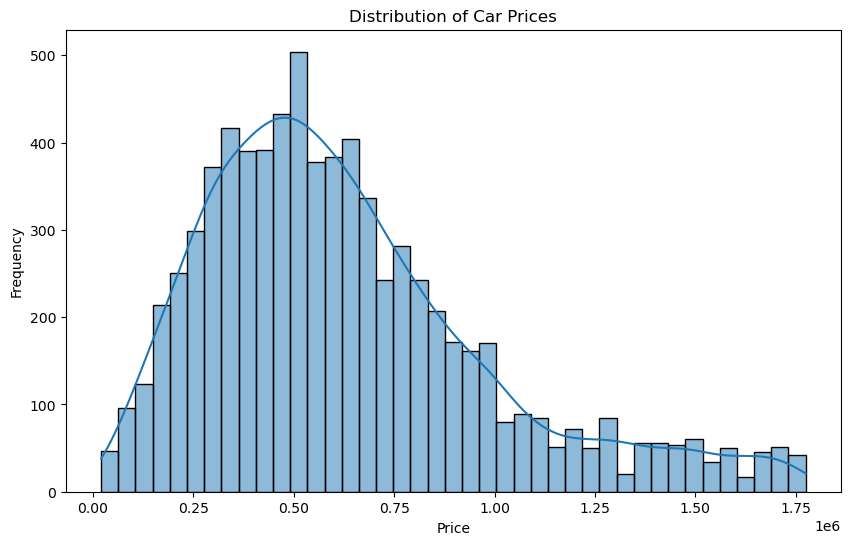

In [35]:
# Distribution Plot for Price
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

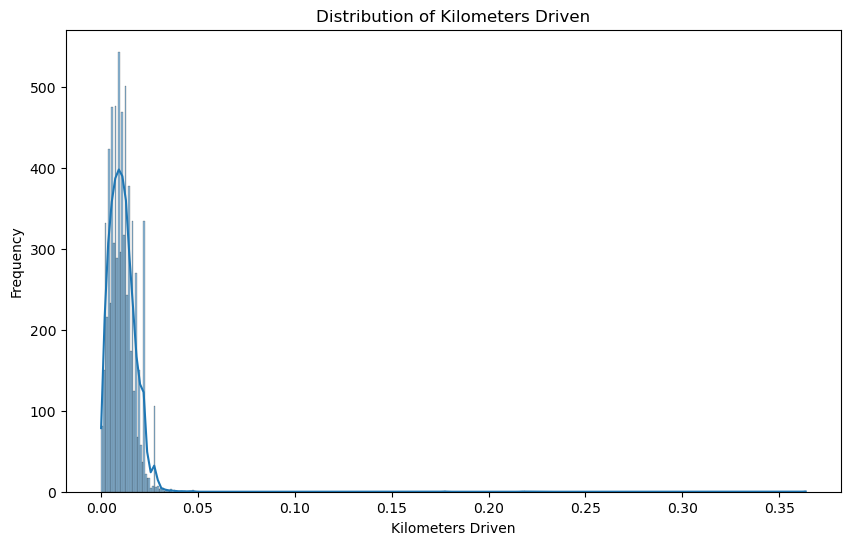

In [37]:
# Distribution Plot for Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['km'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

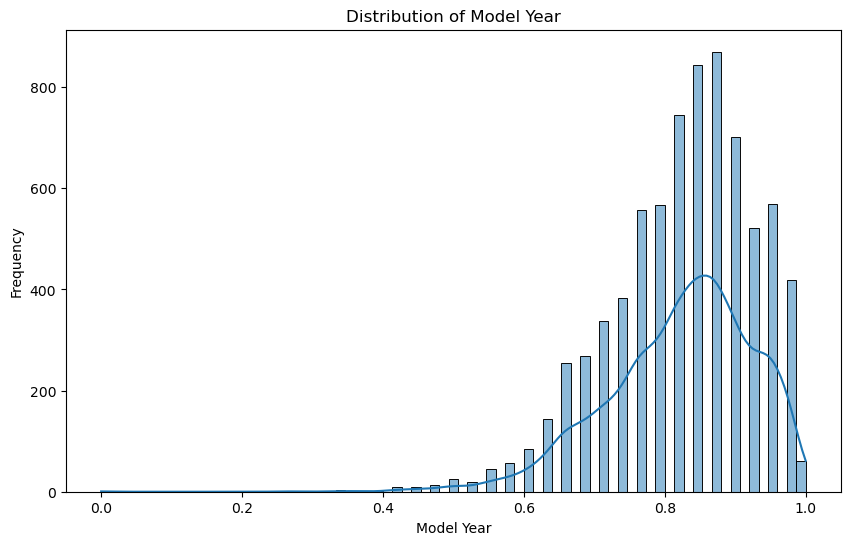

In [39]:
# Distribution Plot for Model Year
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

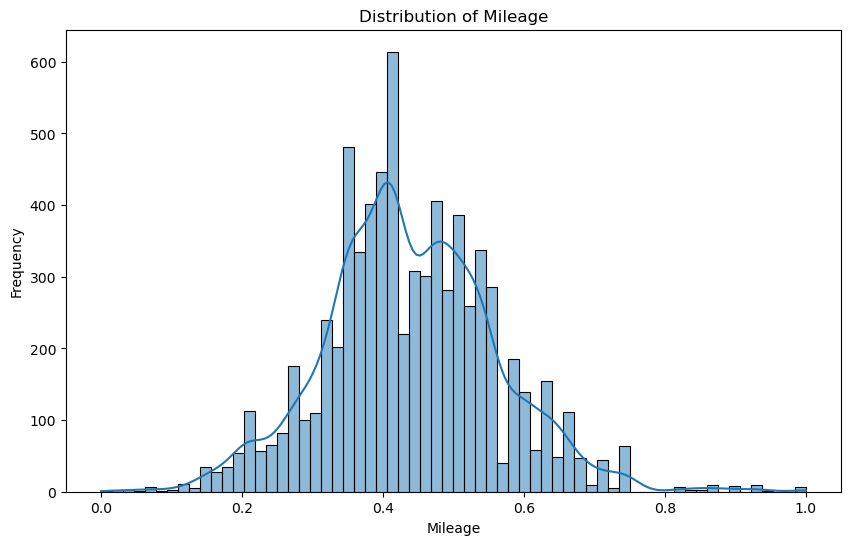

In [41]:
# Distribution Plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

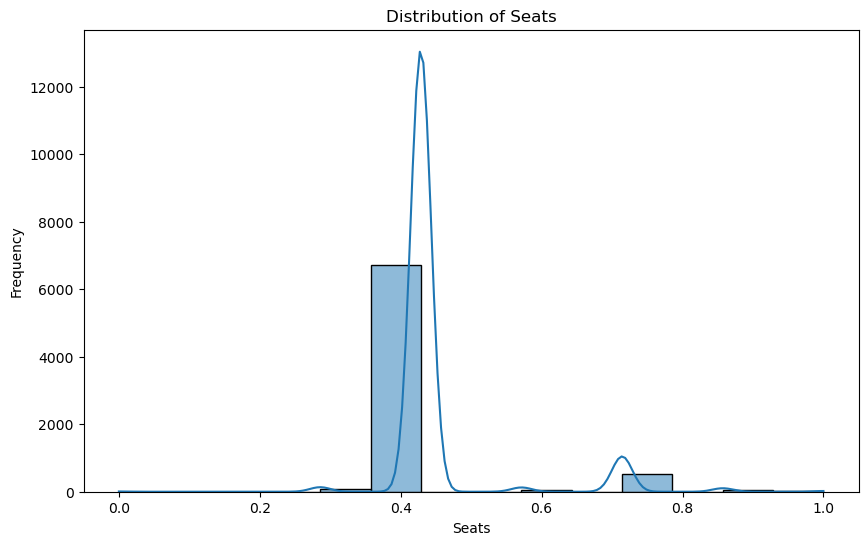

In [43]:
# Distribution Plot for Seats
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

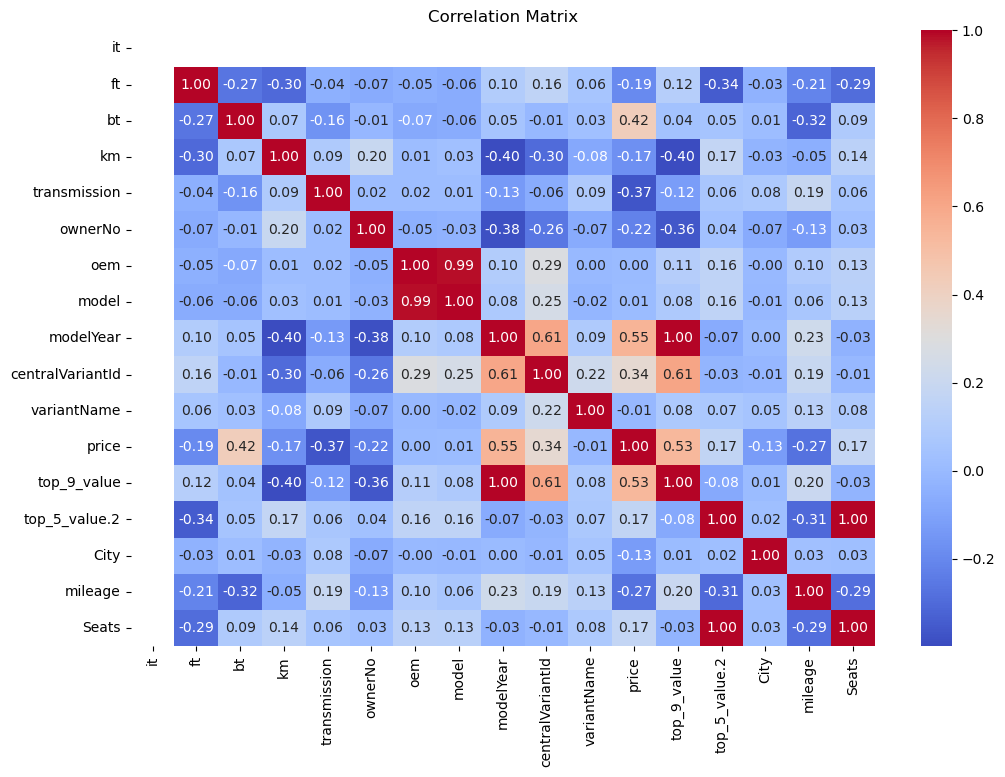

In [45]:
# Select only numeric columns
df_numeric = df_scaled.select_dtypes(include=[np.number])

# Correlation Matrix for the scaled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

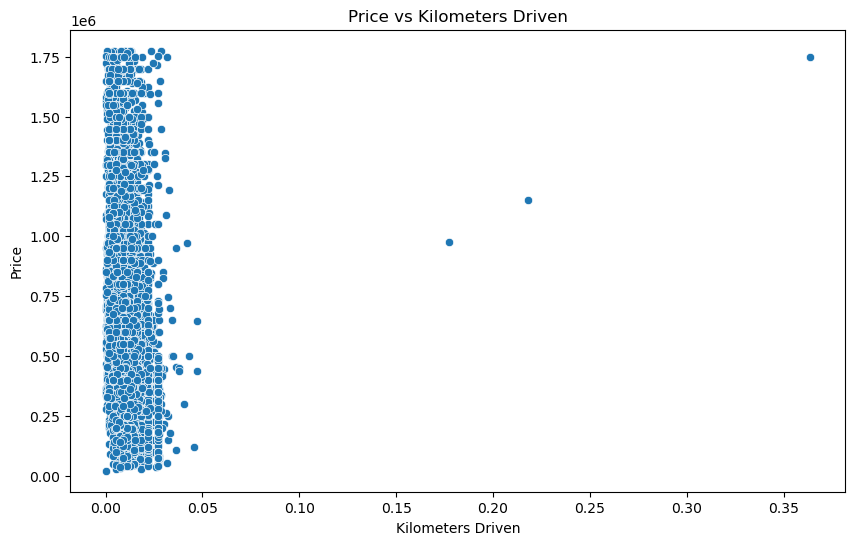

In [47]:
# Scatter Plot of Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df_scaled)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

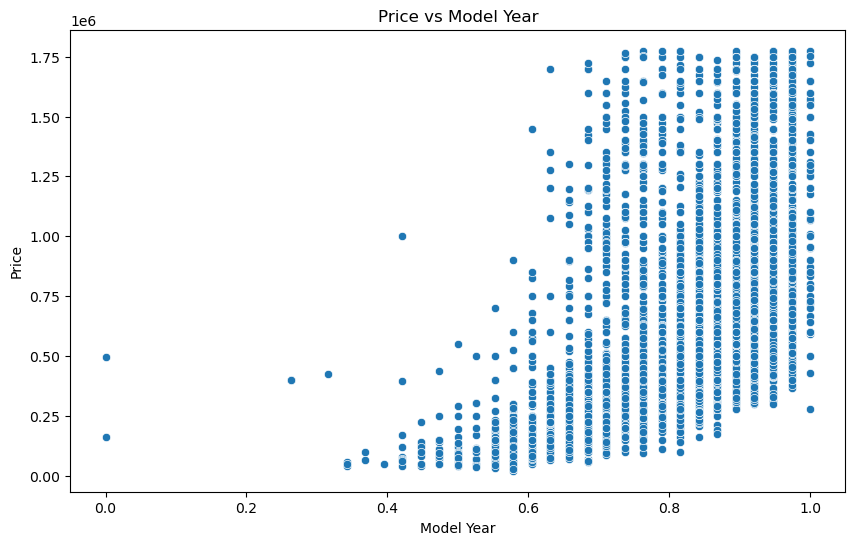

In [49]:
# Scatter Plot of Price vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df_scaled)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

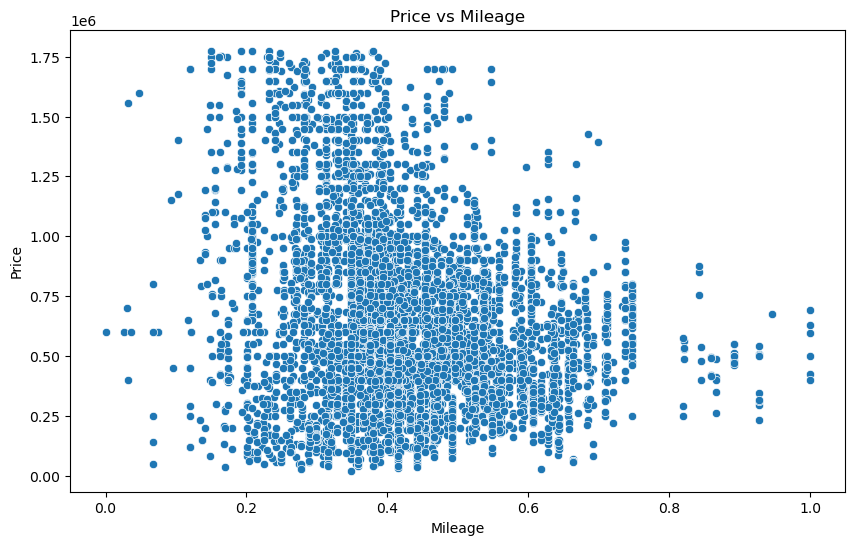

In [51]:
# Scatter Plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df_scaled)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

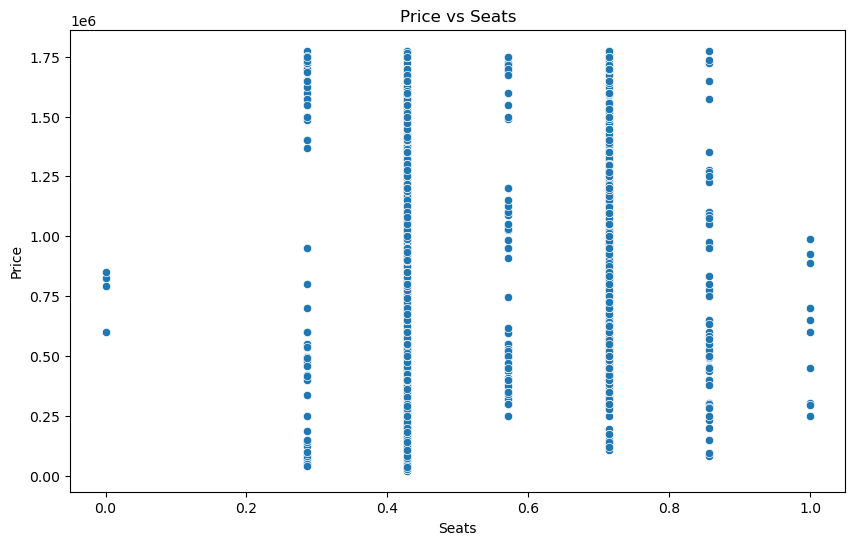

In [53]:
# Scatter Plot of Price vs Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='price', data=df_scaled)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

# Data Cleaning Without Scaling and Ecoding (For Future Use)

In [55]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('car_dekho_Structured.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('car_dekho_cleaned_dataset_Raw.csv', index=False)

print("Data cleaning complete. Cleaned dataset saved ")

Data cleaning complete. Cleaned dataset saved 
